
THE APPLICATION OF TEXT DATA FOR SENTIMENTAL ANALYSIS

In [1]:

import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

dataset = pd.read_csv('combined_data.csv')

In [2]:
dataset

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1
...,...,...,...
1987,1987,I think food should have flavor and texture an...,0
1988,1988,Appetite instantly gone.,0
1989,1989,Overall I was not impressed and would not go b...,0
1990,1990,The whole experience was underwhelming and I t...,0


In [3]:
dataset.shape

(1992, 3)

In [4]:
dataset.isna().sum()

Unnamed: 0    0
text          0
sentiment     0
dtype: int64

In [5]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [6]:
#separate the sentences and label in to training and test datasets with ratio of 4 : 1 respectively
training_size = int(len(sentences)* 0.8)

training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



In [8]:
# make label into numpy array for use later 
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

THE STAGE OF TOKENIZER THE SENTENCES

In [9]:
vocab_size = 2000
embedding_dim = 10 
max_length = 25
padding_type='post'
truncat_type ='post'
oov_tok ="<OOV>"
# let Tokenizer the training dataset
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok )
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# make word_index to sequences

sequences = tokenizer.texts_to_sequences(training_sentences)


In [10]:
# Let pad and truncate the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncat_type,)
print("Training Padding")
print(padded)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncat_type)
print("Test Padding")
print(test_padded)



Training Padding
[[ 26  68   7 ...   0   0   0]
 [ 20  90  76 ...   0   0   0]
 [ 19  13   2 ...   0   0   0]
 ...
 [  4  50 809 ...   0   0   0]
 [ 14  20  13 ...   0   0   0]
 [  4   1   5 ...   0   0   0]]
Test Padding
[[  41  118 1473 ...  335    0    0]
 [  43   66   23 ...    0    0    0]
 [  20  364   19 ...    0    0    0]
 ...
 [ 255    4   10 ...    0    0    0]
 [   2  690  230 ...    0    0    0]
 [ 125   32   46 ...    5  315    8]]


THE STAGE OF EMBEDDING 

In [11]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 10)            20000     
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 20,073
Trainable params: 20,073
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
num_epochs=12

history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(test_padded, testing_labels_final) )

# evaluate the model


Train on 1593 samples, validate on 399 samples
Epoch 1/12
1593/1593 [==============================] - 6s 4ms/sample - loss: 0.6927 - accuracy: 0.5493 - val_loss: 0.6920 - val_accuracy: 0.6115
Epoch 2/12
1593/1593 [==============================] - 1s 329us/sample - loss: 0.6846 - accuracy: 0.6196 - val_loss: 0.6848 - val_accuracy: 0.5464
Epoch 3/12
1593/1593 [==============================] - 0s 159us/sample - loss: 0.6603 - accuracy: 0.7445 - val_loss: 0.6645 - val_accuracy: 0.6642
Epoch 4/12
1593/1593 [==============================] - 0s 173us/sample - loss: 0.6171 - accuracy: 0.8073 - val_loss: 0.6247 - val_accuracy: 0.7243
Epoch 5/12
1593/1593 [==============================] - 0s 172us/sample - loss: 0.5525 - accuracy: 0.8851 - val_loss: 0.5742 - val_accuracy: 0.7594
Epoch 6/12
1593/1593 [==============================] - 0s 167us/sample - loss: 0.4765 - accuracy: 0.9071 - val_loss: 0.5261 - val_accuracy: 0.7744
Epoch 7/12
1593/1593 [==============================] - 0s 161us/sa

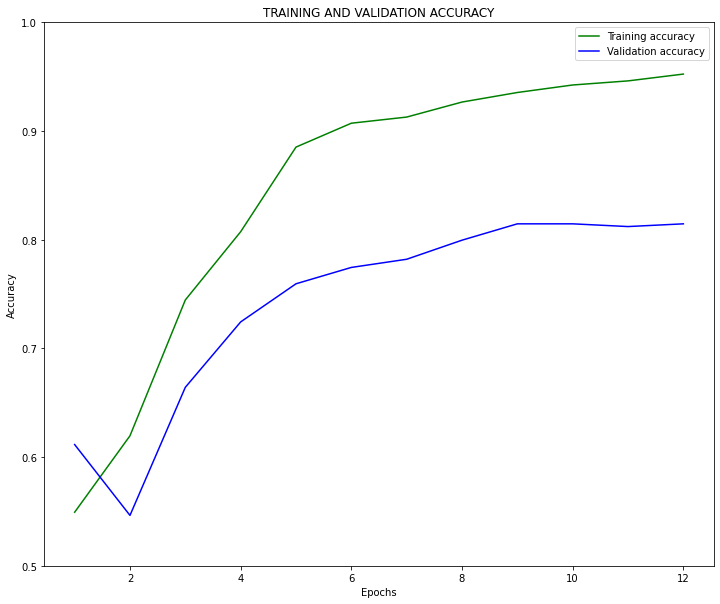

In [15]:
history_dict = history.history
accy = history_dict['accuracy']
val_accy = history_dict['val_accuracy']
epochs = range(1, len(accy) + 1)

pyplot.figure(figsize=(12, 10))
pyplot.plot(epochs, accy, 'g', label = 'Training accuracy')
pyplot.plot(epochs, val_accy, 'b', label = 'Validation accuracy')
pyplot.title('TRAINING AND VALIDATION ACCURACY')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend(loc='upper right')
pyplot.ylim((0.5, 1))
pyplot.show()
